<a href="https://colab.research.google.com/github/AlmondSund/SyS_2025_2/blob/main/Taller1_SyS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

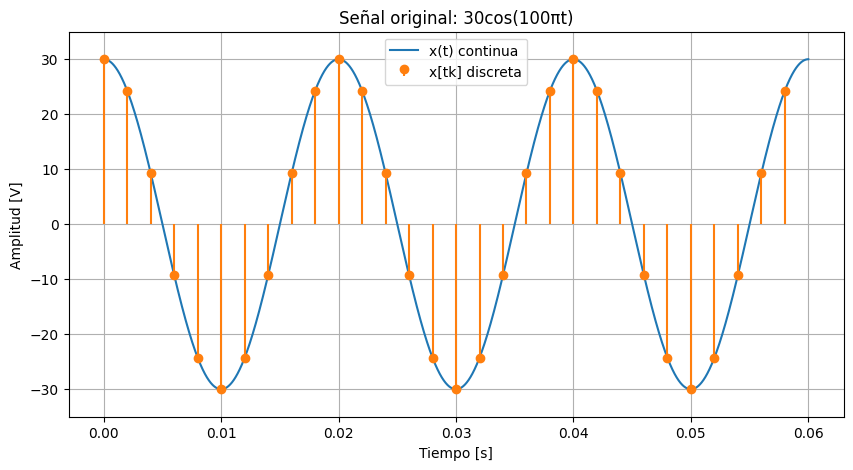

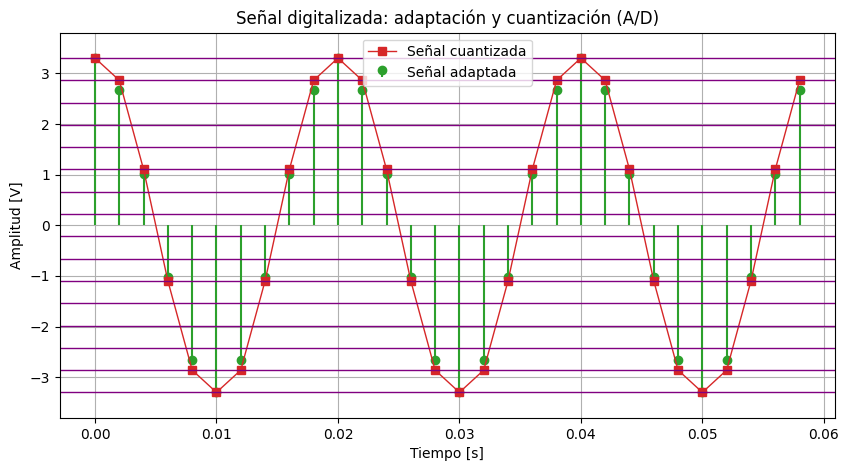

In [3]:
"""
4. Discretización de señales
=========================================================
Se tiene un microprocesador de 4 bits con entrada análoga
entre -3.3 y 3.3 [V]. Describa las condiciones necesarias
para que el microprocesador pueda digitalizar la señal

x(t) = 30cos(100πt).

Presente una simulación en Python de dicho proceso para
tres ciclos de la señal x(t).
"""
import numpy as np
import matplotlib.pyplot as plt

"""Parámetros de la señal"""
A = 30.0            # Amplitud [V]
Fo = 50.0           # Frecuencia [Hz] (100π rad/s => 50 Hz)
To = 1.0/Fo         # Periodo [s]

"""Muestreo"""
Fs = 10*Fo          # Frecuencia de muestreo [Hz], por Teorema de Nyquist (Fs > 2*Fo)
Ts = 1.0/Fs         # Periodo de muestreo [s]

"""Tiempos [s]"""
sim_time = 3*To                     # Tiempo de simulación (3 ciclos)
t = np.linspace(0, sim_time, 20000) # Tiempo continuo
t_k = np.arange(0, sim_time, Ts)    # Tiempo discreto

"""Señal original [V]"""
x_t = A*np.cos(2*np.pi*Fo*t)    # Señal continua
x_tk = A*np.cos(2*np.pi*Fo*t_k) # Señal muestreada

"""Parámetros del A/D"""
V_min, V_max = -3.3, 3.3          # Rango de voltaje del A/D [V]
n_bits = 4                        # Número de bits del A/D
num_levels = 2**n_bits                # Niveles de cuantización

"""Adaptación de la señal para que entre en el rango del A/D"""
gain = V_max/A                  # Pendiente de la recta de adaptación [V/V]
offset = (V_max + V_min) / 2    # Cero de la recta de adaptación [V]
x_tk_adj = gain*x_tk + offset   # Señal adaptada [V]

"""Cuantización"""
levels = np.linspace(V_min, V_max, num_levels)                # Niveles de cuantización
distances = np.abs(x_tk_adj[:, None] - levels[None, :])   # Distancias (euclidianas) a cada nivel
indices = np.argmin(distances, axis=1)                      # Mínima distancia por cada fila/nivel (axis=1 -> filas)
x_tk_q = levels[indices]                                  # Señal cuantizada

"""Visualización"""
# Gráfica 1: Señal original continua y discreta
plt.figure(figsize=(10, 5))
plt.plot(t, x_t, label='x(t) continua', color='C0')
plt.stem(t_k, x_tk, label='x[tk] discreta', linefmt='C1-', markerfmt='C1o', basefmt=" ")
plt.title('Señal original: 30cos(100πt)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.ylim(-35, 35)
plt.grid()
plt.legend()
plt.show()

# Gráfica 2: Señal adaptada, cuantizada y niveles de cuantización (A/D)
plt.figure(figsize=(10, 5))
plt.stem(t_k, x_tk_adj, label='Señal adaptada', linefmt='C2-', markerfmt='C2o', basefmt=" ")
plt.plot(t_k, x_tk_q, label='Señal cuantizada', color='C3', marker='s', linestyle='-', linewidth=1)
# Dibujar los niveles de cuantización como rectas constantes
for lvl in levels:
	plt.axhline(lvl, color='purple', linewidth=1)
plt.title('Señal digitalizada: adaptación y cuantización (A/D)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.ylim(V_min-0.5, V_max+0.5)
plt.grid()
plt.legend()
plt.show()